In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# T-SNE 
from sklearn.manifold import TSNE

## All data

In [2]:
# 1
# bring all dadta 
df_all = pd.read_csv('dict_all.csv')
df_all = df_all.dropna(axis=0)


# 2
# convert has_dep_diag to int type 
# for example,
# No  ICD-10 diagnosis of depression --> 0 
# Yes ICD-10 diagnosis of depression --> 1
has_dep_diag_list = df_all['has_dep_diag'].tolist()

for i in range(len(has_dep_diag_list)):
    if has_dep_diag_list[i] == ' No ICD-10 diagnosis of depression':
        has_dep_diag_list[i] = 0
    elif has_dep_diag_list[i] == 'Yes ICD-10 diagnosis of depression':
        has_dep_diag_list[i] = 1
        
del df_all['has_dep_diag']
df_all['has_dep_diag'] = has_dep_diag_list


# 3
# remove all Y targets 
all_data = df_all.copy()
del all_data['dep_score']
del all_data['dep_thoughts']
del all_data['has_dep_diag']
del all_data['prim_diag']
del all_data['secd_diag']
# now all_data has every columns except Y targets 


# 4
# define targets 
all_dep_score_target = df_all['dep_score'].copy()
all_dep_thoughts_target = df_all['dep_thoughts'].copy()
all_has_dep_diag_target = df_all['has_dep_diag'].copy()
all_prim_diag_target = df_all['prim_diag'].copy()
all_secd_diag_target = df_all['secd_diag'].copy()

In [3]:
df_all

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score,dep_thoughts,prim_diag,secd_diag,has_dep_diag
18,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0
33,2.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0
66,1.0,0.0,1.0,2.0,1.0,1.0,3.0,3.0,11.0,4.0,1
67,2.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,8.0,2.0,0
76,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
13685,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0
13694,3.0,3.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0
13701,3.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0
13720,2.0,3.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0


## Sampled data

In [4]:
# bring sampled data
sampled_dep_score = pd.read_csv('sampled_dep_score.csv')

# sampled data
sampled_dep_score_data = sampled_dep_score.copy()
del sampled_dep_score_data['dep_score']

# sampled target 
sampled_dep_score_target = sampled_dep_score['dep_score'].copy()

In [5]:
sampled_dep_thoughts = pd.read_csv('sampled_dep_thoughts.csv')

# sampled data
sampled_dep_thoughts_data = sampled_dep_thoughts.copy()
del sampled_dep_thoughts_data['dep_thoughts']

# sampled target 
sampled_dep_thoughts_target = sampled_dep_thoughts['dep_thoughts'].copy()

In [6]:
sampled_has_dep_diag = pd.read_csv('sampled_has_dep_diag.csv')

# sampled data
sampled_has_dep_diag_data = sampled_has_dep_diag.copy()
del sampled_has_dep_diag_data['has_dep_diag']

# sampled target 
sampled_has_dep_diag_target = sampled_has_dep_diag['has_dep_diag'].copy()

In [7]:
sampled_prim_diag = pd.read_csv('sampled_prim_diag.csv')

# sampled data
sampled_prim_diag_data = sampled_prim_diag.copy()
del sampled_prim_diag_data['prim_diag']

# sampled target
sampled_prim_diag_target = sampled_prim_diag['prim_diag'].copy()

In [8]:
sampled_secd_diag = pd.read_csv('sampled_secd_diag.csv')

# sampled data
sampled_secd_diag_data = sampled_secd_diag.copy()
del sampled_secd_diag_data['secd_diag']

# sampled target
sampled_secd_diag_target = sampled_secd_diag['secd_diag'].copy()

# T-SNE: dep_score

### All data

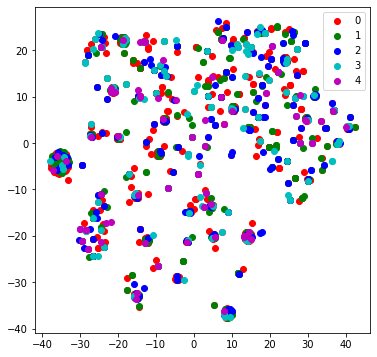

In [9]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(all_data)
target_ids = range(5)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4]):
    plt.scatter(X_2d[all_dep_score_target == i, 0], X_2d[all_dep_score_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Sampled data

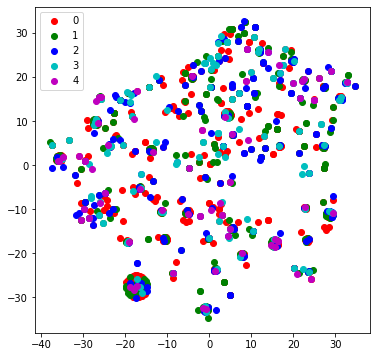

In [10]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(sampled_dep_score_data)
target_ids = range(5)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4]):
    plt.scatter(X_2d[sampled_dep_score_target == i, 0], X_2d[sampled_dep_score_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

# T-SNE: dep_thoughts

### All data

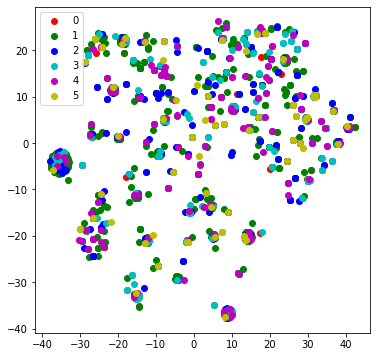

In [11]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(all_data)
target_ids = range(6)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4, 5]):
    plt.scatter(X_2d[all_dep_thoughts_target == i, 0], X_2d[all_dep_thoughts_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Sampled data

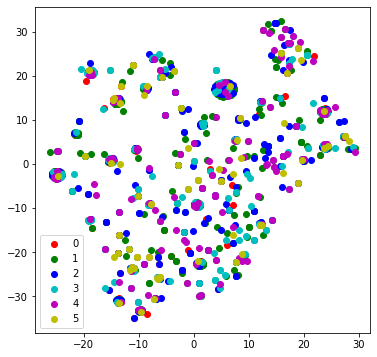

In [12]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(sampled_dep_thoughts_data)
target_ids = range(6)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4, 5]):
    plt.scatter(X_2d[sampled_dep_thoughts_target == i, 0], X_2d[sampled_dep_thoughts_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

# T-SNE: has_dep_diag

### All data

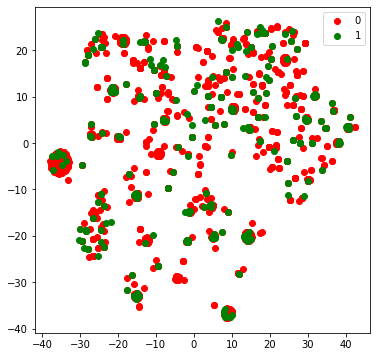

In [13]:
# No  ICD-10 diagnosis of depression --> 0 
# Yes ICD-10 diagnosis of depression --> 1

tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(all_data)
target_ids = range(2)

plt.figure(figsize=(6, 6))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, [0, 1]):
    plt.scatter(X_2d[all_has_dep_diag_target == i, 0], X_2d[all_has_dep_diag_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Sampled data

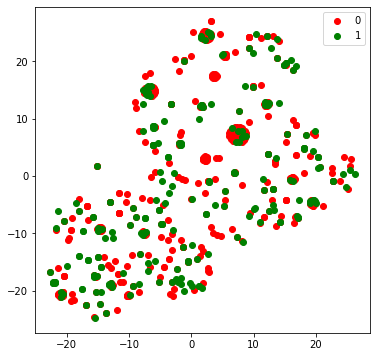

In [14]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(sampled_has_dep_diag_data)
target_ids = range(2)

plt.figure(figsize=(6, 6))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, [0, 1]):
    plt.scatter(X_2d[sampled_has_dep_diag_target == i, 0], X_2d[sampled_has_dep_diag_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

# T-SNE: prim_diag

### All data

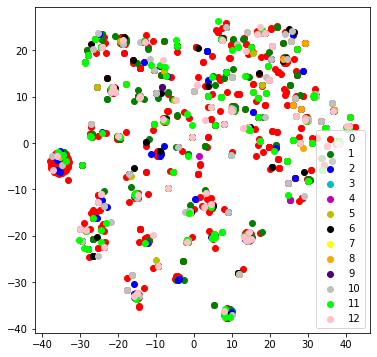

In [15]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(all_data)
target_ids = range(13)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'indigo', 'silver', 'lime', 'pink'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]):
    plt.scatter(X_2d[all_prim_diag_target == i, 0], X_2d[all_prim_diag_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Sampled data

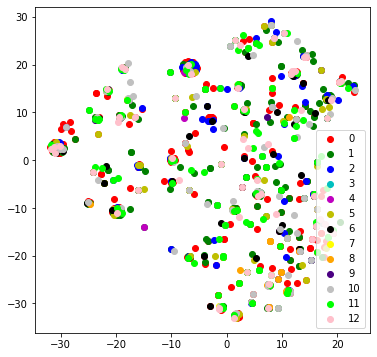

In [16]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(sampled_prim_diag_data)
target_ids = range(13)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'indigo', 'silver', 'lime', 'pink'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]):
    plt.scatter(X_2d[sampled_prim_diag_target == i, 0], X_2d[sampled_prim_diag_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

# T-SNE: secd_diag

### All data

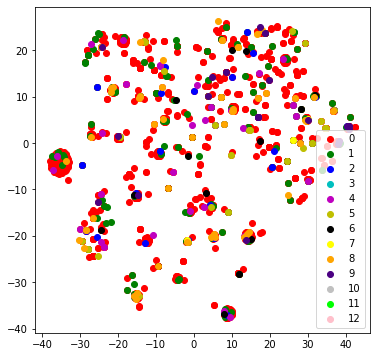

In [17]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(all_data)
target_ids = range(13)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'indigo', 'silver', 'lime', 'pink'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]):
    plt.scatter(X_2d[all_secd_diag_target == i, 0], X_2d[all_secd_diag_target == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Sampled data

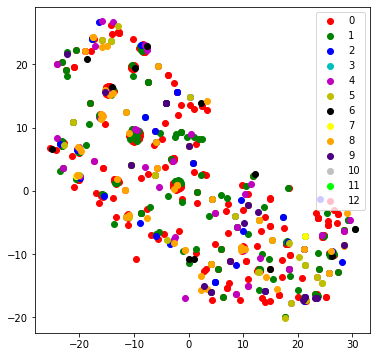

In [18]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(sampled_secd_diag_data)
target_ids = range(13)

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'indigo', 'silver', 'lime', 'pink'
for i, c, label in zip(target_ids, colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]):
    plt.scatter(X_2d[sampled_secd_diag_target == i, 0], X_2d[sampled_secd_diag_target == i, 1], c=c, label=label)
plt.legend()
plt.show()